In [150]:
#import libraries
import os
import csv
import cv2
from keras.preprocessing.image import ImageDataGenerator
#importing libraries need for building and training models
import numpy as np
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation, Conv2D, MaxPool2D, BatchNormalization
import tensorflow as tf
import pandas as pd
from datetime import datetime

In [185]:
#augmenting the images to make dataset of large number of photos.
inimage_dir_path = '/content/drive/MyDrive/Assignment_AI/dataset'

out_dir = '/content/drive/MyDrive/Assignment_AI/augmented_image'

if not os.path.exists(out_dir):
  os.makedirs(out_dir)

for eachperson_dir in os.listdir(inimage_dir_path):
  for imge in os.listdir(os.path.join(inimage_dir_path, eachperson_dir)):
    if imge == '.ipynb_checkpoints':
      continue
    else:
      print(os.path.join(inimage_dir_path,eachperson_dir, imge))
      in_image = cv2.imread(os.path.join(inimage_dir_path,eachperson_dir, imge))
      in_image = cv2.cvtColor(in_image, cv2.COLOR_BGR2RGB)
      in_image = np.array(in_image)
      in_image = in_image.reshape((1,) + in_image.shape)


#initializes image data generator for augmentation
      datagen = ImageDataGenerator(
          #rotation shifitng
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      #shearing image
      shear_range=0.2,
      #zooming image
      zoom_range=0.2,
      #flipping image horizontally
      horizontal_flip=True,
      #filling
      fill_mode='nearest'

      )

      aug_images = datagen.flow(in_image, batch_size=1, save_to_dir=out_dir, save_format='jpg')
      numofaugmented_images = 200
      for i in range(numofaugmented_images):
        aug_image = next(aug_images)[0]
        aug_image = aug_image.astype(np.uint8)
        cv2.imwrite(os.path.join(out_dir, f"{i}_{imge}"), aug_image)


/content/drive/MyDrive/Assignment_AI/dataset/Student6/Student6.jpg
/content/drive/MyDrive/Assignment_AI/dataset/Student3/Student3a.jpg
/content/drive/MyDrive/Assignment_AI/dataset/Student2/Student2.jpg
/content/drive/MyDrive/Assignment_AI/dataset/Student1/Student1.jpg
/content/drive/MyDrive/Assignment_AI/dataset/Student4/Student4.jpeg
/content/drive/MyDrive/Assignment_AI/dataset/Student5/Student5.jpg
/content/drive/MyDrive/Assignment_AI/dataset/Student7/Student7.jpg
/content/drive/MyDrive/Assignment_AI/dataset/Student8/Student8.jpg
/content/drive/MyDrive/Assignment_AI/dataset/Student9/Student9.JPG
/content/drive/MyDrive/Assignment_AI/dataset/Sadikshya/Sadikshya.jpg


In [186]:
#csv file is generated for dataset

img_csv_file = '/content/drive/MyDrive/Assignment_AI/imagedataset.csv'
img_directory = '/content/drive/MyDrive/Assignment_AI/augmented_image'


#list of image file are created
#only .jpg and .png files are saved in this directory

img_files = [filename for filename in os.listdir(img_directory) if filename.endswith(".jpg") ]

# csv file will be created
with open(img_csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['img', 'namee'])

    for filename in img_files:
        # Extract the label from the filename
        splite_name = filename.split("_")
        if len(splite_name) == 2:
          label = splite_name[1].split(".")[0]
          # Write the image path and label to the CSV file
          writer.writerow([os.path.join(img_directory, filename), label])

d_data = pd.read_csv(img_csv_file)

#shuffling for data
shuff_data = d_data.sample(frac=1).reset_index(drop=True)

# the shuffled data are saved in a csv file.
shuff_data.to_csv(img_csv_file, index=False)



In [210]:

# Create a label encoder to convert names into numerical labels
labelencoder = LabelEncoder()

# Create a dictionary to store name-encoding pairs
nameencoding_dict = {}

# Read and preprocess the images
imagees = []
namees = []

#creates csv reader file

with open(img_csv_file, 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        image_path = row[0]
        name = row[1]

        # adds new name with encoding
        if name not in nameencoding_dict:
            en_coding = len(nameencoding_dict)
            nameencoding_dict[name] = en_coding

#reads the image path
        imag = cv2.imread(image_path)
#resizes the image
        imag = cv2.resize(imag, (64, 64))

        imagees.append(imag)

        #encodes corresponding name from dictionary and adds to list
        encoding = nameencoding_dict[name]
        namees.append(en_coding)

#coverts images list to a Numpy array
imagess = np.array(imagees)

#converts names list to NumPy array
namess = np.array(namees)



In [211]:
#prints value at index 2
print(namess[2], nameencoding_dict)


1 {'Student2': 0, 'Student8': 1, 'Sadikshya': 2, 'Student1': 3, 'Student5': 4, 'Student6': 5, 'Student7': 6, 'Student3a': 7}


In [212]:
#divides data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(imagess, namess, test_size=0.2, random_state=42)


In [213]:
#prints length of training image
#length of training labels
#length of testing image
print(len(X_train), len(y_train), len(X_test))


1280 1280 320


In [214]:
from tensorflow.keras.layers import MaxPooling2D
# Creating a CNN model for the system
model = Sequential()

kernel_size = (3, 3)
pool_size = (2, 2)

# Adding a_Conv2D_layer
model.add(Conv2D(16, kernel_size, input_shape=(64, 64, 3), kernel_initializer=tf.keras.initializers.he_uniform))

# Adding BatchNormalization
model.add(BatchNormalization())

# Adding ReLUactivation
model.add(Activation('relu'))

# Adding MaxPooling2D layer
model.add(MaxPooling2D(pool_size))

# Adding another_Conv2D_layer
model.add(Conv2D(16, kernel_size, kernel_initializer=tf.keras.initializers.he_uniform))

# Adding BatchNormalization
model.add(BatchNormalization())

# Adding ReLU_activation
model.add(Activation('relu'))

# Adding MaxPooling2D_layer
model.add(MaxPooling2D(pool_size))

# Adding anotherConv2Dlayer
model.add(Conv2D(32, kernel_size, kernel_initializer=tf.keras.initializers.he_uniform))

# Adding BatchNormalization
model.add(BatchNormalization())

# Adding a_ReLUactivation
model.add(Activation('relu'))

# Adding MaxPooling2D_layer
model.add(MaxPooling2D(pool_size))

# Adding another_Conv2D_layer
model.add(Conv2D(32, kernel_size, kernel_initializer=tf.keras.initializers.he_uniform))

# Adding BatchNormalization
model.add(BatchNormalization())

# Adding ReLU_activation
model.add(Activation('relu'))

# Adding MaxPooling2D_layer
model.add(MaxPooling2D(pool_size))

# Adding aFlattenlayer
model.add(Flatten())

# Adding aDenselayer
model.add(Dense(64, kernel_initializer=tf.keras.initializers.he_uniform))

# Adding a_BatchNormalization
model.add(BatchNormalization())

# Adding ReLUactivation
model.add(Activation('relu'))

# Adding a_Dropout
model.add(Dropout(0.7))

# Adding anotherDenselayer
model.add(Dense(11))

# Adding softmax activation for multi-class classification
model.add(Activation('softmax'))

# specifying optimizer, evaluation metric, and loss function
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])


In [215]:
#training model using training data for 10 epoch
#dividing data in batch of 16 for traaining
model.fit(X_train, y_train, epochs=10, batch_size=16)


Epoch 1/10
80/80 [==============================] - 7s 45ms/step - loss: 2.2142 - accuracy: 0.3117
Epoch 2/10
80/80 [==============================] - 4s 45ms/step - loss: 0.6603 - accuracy: 0.8320
Epoch 3/10
80/80 [==============================] - 5s 59ms/step - loss: 0.3125 - accuracy: 0.9508
Epoch 4/10
80/80 [==============================] - 4s 47ms/step - loss: 0.1856 - accuracy: 0.9789
Epoch 5/10
80/80 [==============================] - 4s 45ms/step - loss: 0.1414 - accuracy: 0.9875
Epoch 6/10
80/80 [==============================] - 4s 48ms/step - loss: 0.1153 - accuracy: 0.9906
Epoch 7/10
80/80 [==============================] - 5s 57ms/step - loss: 0.1004 - accuracy: 0.9906
Epoch 8/10
80/80 [==============================] - 4s 45ms/step - loss: 0.0834 - accuracy: 0.9906
Epoch 9/10
80/80 [==============================] - 4s 46ms/step - loss: 0.0714 - accuracy: 0.9930
Epoch 10/10
80/80 [==============================] - 5s 63ms/step - loss: 0.0729 - accuracy: 0.9922


In [199]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='saved.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to saved.jpg


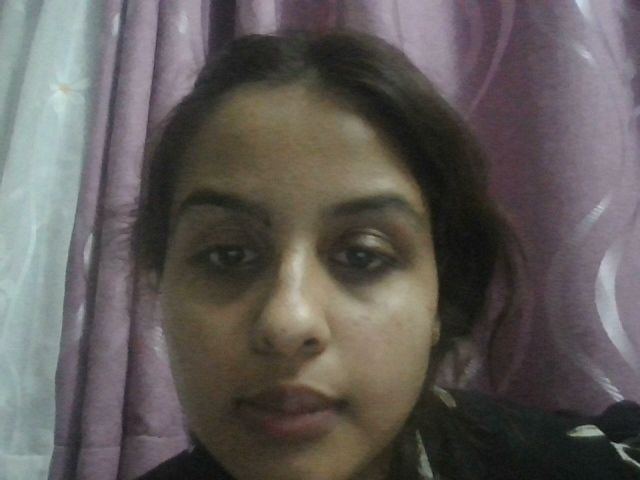

In [200]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [216]:
#loads the image
immg = cv2.imread('/content/saved.jpg')

#for color space conversion of image
immg = cv2.cvtColor(immg, cv2.COLOR_BGR2RGB)

#rezes the image
immg = cv2.resize(immg, (64, 64))

#expands the dimension
immg = np.expand_dims(immg, axis=0)

#predicts the probable class for image
predicted = model.predict(immg)



1/1 [==============================] - 0s 135ms/step


In [202]:
predicted

array([[4.4145230e-03, 3.4620410e-03, 8.1678426e-01, 4.1836980e-03,
        1.2451233e-01, 1.2178240e-02, 1.6614294e-03, 2.9592315e-02,
        5.0289335e-04, 1.0278145e-03, 1.6804505e-03]], dtype=float32)

In [203]:
answer = np.array(predicted)

# Find the index of the largest value in the array
index = np.argmax(answer)

# find person name

for key, val in name_encoding_dict.items():
  from datetime import datetime
  if(val == index):
     # print(key)
     file_name = 'attendancestudent.csv'
     with open(file_name, 'a', newline='') as file:
      now = datetime.now()
      writer = csv.writer(file)
      writer.writerow([key, now])
      file.flush()
